## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  

This project focuses on understanding the results from an A/B test run by an e-commerce website by facilitating the company to understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#Required modules
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  

a. Read in the dataset and look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. The number of rows in the dataset.

In [3]:
len(df)

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').user_id.nunique()/df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
len(df[((df['group'] == 'treatment') != (df['landing_page'] == 'new_page'))])

3893

f. Check for missing values?

In [7]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` Often time data can have rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, it is impossible to be sure if this row truly received the new or old page. Checking for this specification helps to better undertand the data.

a. Store your new dataframe in **df2** that meets the above specification.

In [8]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** to explore the data further.

a. Unique **user_id**s in **df2**

In [10]:
df2['user_id'].nunique()

290584

b. Show duplicated **user_id** in **df2** if any.

In [11]:
df2[df2.duplicated('user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. Remove duplicated **user_id** from **df2**.

In [13]:
df2 = df2.drop_duplicates(['user_id'], keep = 'first')


`4.` Using **df2** to explore some probability questions .

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
len(df2.query('converted == 1'))/len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df3 = df2.query('group == "control"')

len(df3.query('converted == 1'))/len(df3)








0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df4 = df2.query('group == "treatment"')

len(df4.query('converted == 1'))/len(df4)

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
len(df2.query('landing_page == "new_page"'))/len(df2)

0.5000619442226688

e. **Discusisons**

**There is an almost equal chance of an individual receiving new page or an old page. This means the test is unbiased. Probability of an individual converting devoid of what page they recieve is only about 12%. While further tests are required to confirm results, probability of an individual converting is considerably low indicating that new treatment page may not succesully guarantee more convertions.**

<a id='ab_test'></a>
### Part II - A/B Test

`1.` Assuming that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, null and alternative hypotheses were first defined.

**Null Hypothesis : p_new - p_old <= 0**

**Alternate Hypothesis : p_new - p_old > 0**

*This is a right tail test

`2.` Assuming under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assuming they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Using a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Sampling distribution was performed for the difference in **converted** between the two pages using over 10,000 iterations to calculate an estimate from the null.  <br><br>


a. **convert rate** for $p_{new}$ under the null? 

In [18]:
p_new = len(df2.query('converted == 1'))/len(df2)
p_new

0.11959708724499628

b. **convert rate** for $p_{old}$ under the null <br><br>

In [19]:
p_old = len(df2.query('converted == 1'))/len(df2)
p_old

0.11959708724499628

c. Determine $n_{new}$

In [20]:
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

d. Determine $n_{old}$

In [21]:
n_old = len(df2.query('landing_page == "old_page"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0,1], n_new, [1-p_new, p_new])


    

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0,1], n_old, [1-p_old, p_old])



g. Determine $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
p_new = len(new_page_converted[new_page_converted==1])/len(new_page_converted)
p_old = len(old_page_converted[old_page_converted==1])/len(old_page_converted)

p_new - p_old

0.00010975640925348085

h. Simulate 10,000 iterations of $p_{new}$ - $p_{old}$ values using the above process.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
obs_diff = df2['converted'][df2['group'] == 'treatment'].mean() - df2['converted'][df2['group'] == 'control'].mean()

_p_diffs = []

for _ in range(10000):
    # 1st parameter dictates the choices you want.  In this case [1, 0]
    _p_new = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new]).mean()
    _p_old = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old]).mean()
    _p_diffs.append(_p_new - _p_old)
_p_diffs = np.array(_p_diffs)
print ("Proportion Greater : {}".format((_p_diffs > obs_diff).mean()))
    

Proportion Greater : 0.8114


i. Plot a histogram using **p_diffs**.  

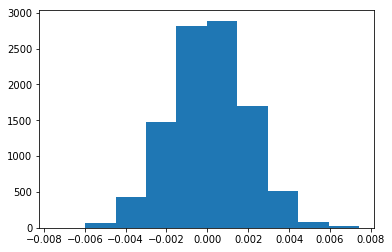

In [26]:
plt.hist(_p_diffs)
plt.show()

j. Indicate proportion of the **p_diffs** that are greater than the actual difference observed in **ab_data.csv**

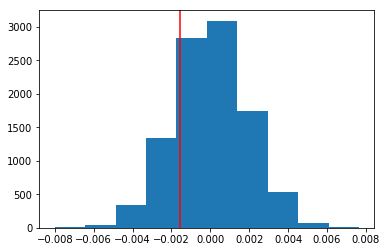

In [27]:
p_diffs = np.array(_p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals);

act_pold = len(df2[((df2['landing_page'] == 'old_page') == (df2['converted'] == 1))])/n_old
act_pnew = len(df2[((df2['landing_page'] == 'new_page') == (df2['converted'] == 1))])/n_new

plt.axvline(x=obs_diff, color='red')
plt.show()



k. **Discussions**

**Under the null hypothesis where the conversion rates for both old page and new page is assumed to be the same, the above probability distribution plot shows the distribution of sample means obtained from the difference between converted new page and converted old page using the synthetically generated data of converted/not converted (0's and 1's) values. The red line shows the actual observed difference of converted new page and converted old page. Since we have established earlier that this is a right tail test (p_new <= p_old), the difference between old page and new page can be considered significant only if the red line above fell on the right extreme of the tail (upper tail critical region) in which case the resulting p-vale would be considerably less than the significant level 0.05. The red line here however falls on the left extreme portion of the tail indicating the probability of finding a sample data with significant difference between the old page and new page is quite low. In other words, p-value 0.83 calculated below suggest the chance of getting a sample data such as those in null distribution is 83%. Thus there is no sufficient evidence to reject null hypothesis and hence we fail to accept that there is significant difference between new page and the old page. **

l. Using built-in code to achieve similar results by calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
#Get statsmodel module to perform statitical analysis
np.warnings.filterwarnings("ignore")
import statsmodels.api as sm
np.warnings.resetwarnings()

convert_old = len(df2.query("landing_page == 'old_page' and converted == 1"))
convert_new = len(df2.query("landing_page == 'new_page' and converted == 1"))
n_old_ = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))




m. Using `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
from scipy.stats import norm

#Divide p-value by 2 since this a one tail test (upper tail test) 
#Since this is a right tail test p-value for right tail is 1-p-value on left tail
z_score,1-p_value/2


(1.3109241984234394, 0.9050583127590245)

n. **Discussions**

**z-score is a test statitic for normally distributed data. Rejection region for an upper tail test in a Z test for a significance level of 0.05 is 1.645. In order to reject the null hypothsis, the resulting z-score value should be greater than the z-critical value (1.645). In this experiment, the z-score value is less than the critical value indicating we fail to reject the null hypothesis. The p-value also agrees with this z-test results. A higher p-value (> than siginificance level 0.05) indicates the that the test is not significant and that there is no evidence to disapprove null hypothesis. These results are in agreement with the findings in parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, logistic regression was used

b. The goal here is to use **statsmodels** to fit the regression model specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, first step is to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df2['intercept'] = 1
df2['ab_page'] = np.where(df2['group'] == 'treatment', 1,0)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Using **statsmodels** to import regression model.  Instantiate the model, and fit the model using the two columns created in part **b.** to predict whether or not an individual converts.

In [31]:
predictortVar = ['intercept', 'ab_page']
logReg = sm.Logit(df2['converted'], df2[predictortVar])
answer = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Summary of model below:

In [32]:
answer.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-08 17:56 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. **Discussions**

**The null hypothesis in the regression model is that there is no significant difference in conversion based on which page a customer receives and so the weight falls on the alternate hypothesis to prove otherwise. Null hypothesis defined in Part II assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%. In Part II, we calculate p-values from a probability distribution. While regression use probability distrbution to describe the data, p-values may vary because regressions are about fitting a straight line. Having said this, both regression and results from probability distribution still should produce the same conclusions. As in this case, both tests indicate there is no statistical difference between the two pages.**

**The Akaike Information Criteria (AIC) and Bayesian Information Criteria (BIC) is fairly high. While both these criteria follow different assumptions, they penalize number of parameters and help in choosing the best predictor subsets. A model is considered to be a fair represention of a true model when AIC/BIC values are lower. This suggest that it is a good idea to explore other predictors that may influence to produce an efficient regression model. Timestamp seems like a good predictor to assess if a certain time period influences the indiviual to convert or not convert. Additionally, assessing if day of the week influnces the individuals to convert or not also seems worthy to explore. Adding additional terms could sometimes lead to complex model. However criteria like AIC/BIC, Mean Squared Error (MSE) can be used to assess if having more than one perdictors improves the model or not. **

g. Along with testing if the conversion rate changes for different pages, adding an effect based on which country a user lives. using **countries.csv**


In [33]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [34]:
### Create the necessary dummy variables

df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.drop('CA', axis=1, inplace=True)

df_new[['new_page', 'old_page']] = pd.get_dummies(df_new['landing_page'])
df_new.head()

# Using CA and old page as baseline
predictorVar = ['intercept', 'new_page', 'US', 'UK']
logReg2 = sm.Logit(df_new['converted'], df_new[predictorVar])
answer2 = logReg2.fit()

answer2.summary2()




Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-08 17:56 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
new_page      -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

**From the summary table above, we calculate the odds ratio. Odds ratio represents the odds of an outcome occuring (in this case converted) given an exposure (in this case new page) as compared to the odds of the occurance of the outcome in the absence of that exposure.**

In [35]:
odds = np.exp(answer2.params[1:])
odds

new_page    0.985168
US          1.041599
UK          1.051944
dtype: float64

**The odds ratio for new page is 0.98 (approximately equal to 1). This means that there is almost an equal chance for an individual converting or not converting.
For each unit increase in US, new page 1.04 times likey holding all else constants
For each unit increase in UK, new page 1.05 times likey holding all else constants**

h. Check for interaction between page and country to see if there significant effects on conversion.  


In [36]:
### Fit Your Linear Model And Obtain the Results

df_new['US_new'] = df_new.new_page * df_new.US
df_new['UK_new'] = df_new.new_page * df_new.UK

predictorVar = ['intercept', 'new_page','US', 'UK', 'US_new', 'UK_new' ]

logReg3 = sm.Logit(df_new['converted'], df_new[predictorVar])
answer3 = logReg3.fit()

answer3.summary2()



Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-08 17:56 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
new_page      -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_new         0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_new         0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

In [37]:
odds = np.exp(answer3.params[1:])
odds

new_page    0.934776
US          1.017682
UK          1.011854
US_new      1.048001
UK_new      1.081428
dtype: float64

**Above results indicate that the model does not improve in any manner. Adding the interactions suggest that the odds of converting for US and new page is 1.04 times likely when compared to CA and new page.**

**Similarly the odds of converting for US and new page is 1.08 times likely when compared to CA and new page.**

**The p-values for all coefficients are above 0.05 indicating that no one predictor is significantly better than the other in predicting the outcome.**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
predictorVar = ['intercept', 'new_page','US', 'UK', 'US_new', 'UK_new' ]
X=df_new[predictorVar]
y = df_new['converted']
#Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Positives: {}, False Positives: {}, False Negatives: {}'.format(tp, fp, fn))

C:\Users\Varsha.Raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


True Positives: 0, False Positives: 0, False Negatives: 10570


**The confusion matrix above shows zero true positives and false positives and has a very high value for false negatives. This means the predictor variables estimates no conversion even though the actual data indicated conversion. A probabilty matrix was created to confirm the results from the confusion matrix. Below is the probabilty of Converting/Not converting for the first 10 rows of the predicted outcome. The matrix indicate that there was nearly 90% chance of estimating no convertions each time by the model. The model has zero precision. The predictor variables are not a good indicator to produce accurate outcome.**

In [39]:
y_pred = logreg.predict_proba(X_test)

y_pred_df = pd.DataFrame(y_pred)

y_pred_df.rename(columns={0 : 'Not Converted', 1 : 'Converted'}).head(10)

,Not Converted,Converted
0,0.880609,0.119391
1,0.881737,0.118263
2,0.881737,0.118263
3,0.880811,0.119189
4,0.888459,0.111541
5,0.881737,0.118263
6,0.881737,0.118263
7,0.881737,0.118263
8,0.880811,0.119189
9,0.880609,0.119391


**As an additional analysis, timescale was used to extract day of the week to see if weekdays or weekends influenced conversions.**

In [40]:
#Get datetime column from timestamp
df_new['datetime'] = pd.to_datetime(df_new['timestamp'])

#Get day of the week in interger format
df_new['day'] = df_new['datetime'].dt.dayofweek

#Categorize as either weekdar or weekend and get dummy variables
df_new['ab_day'] = np.where(df_new['day'] <=5, 'Weekday','Weekend')

df_new[['Weekday', 'Weekend']] = pd.get_dummies(df_new['ab_day'])
df_new.head()

#Perform regression to check the outcome for converting keeping weekday as baseline

predictorVar = ['intercept',  'Weekend']

logReg4 = sm.Logit(df_new['converted'], df_new[predictorVar])
answer4 = logReg4.fit()

answer4.summary2()



Optimization terminated successfully.
         Current function value: 0.366120
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-08 17:58 AIC:              212781.5159
No. Observations:   290584           BIC:              212802.6752
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9946    0.0062  -324.2483  0.0000  -2.0066  -1.9825
Weekend      -0.0124    0.0167    -0.7427  0.4577  -0.0450   0.0203
==================================================================

"""

In [41]:
o = np.exp(-0.0124)
print('Odds Ratio: {:.2f}'.format(o))

Odds Ratio: 0.99


**AIC/BIC values are still high indicating the weekday/weekend predictors do not improve the model in any way. Also the odds ratio from the regression test indicate that the odds of converting on a weekday or on a weekend is the same!**

### Additional Info: Knowing that Part iii is a two-tailed test and Part ii is a one-tail test, can you convert the p-values between each other?

**The p-value in two tail is essentially 2*p-value. So in Part III section d which is a two tail test, we have a p-value of 0.19. In order to get p-value for one tail test, the resulting p-value is simply divided by 2. The default p-value is for the left tail. To get p-value for right tail, the method is 1-p-value of left tail.**

In [42]:
p_val_twotail = 0.19
p_val_lefttail = p_val_twotail/2

p_val_rightttail = 1 - p_val_lefttail
p_val_rightttail


0.905

## References

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://analytics4all.org/2016/05/11/python-logistic-regression/

https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob